# Exploratory data Analysis

## Introduction 
After pre-processing the data available and going through some basic cleaning we are looking at a cleaned CSV data file that contains 5265 rows and 33 columns. All these records contain a Skin symptoms value. Throughout this EDA we will dive deeper to understand underlying connections and correlations amongs dogs with skin conditions in order to identify key reasons (environmental, breed related, genetic, etc.) that could potentially provide a solid foundation for our model to predict a positice or negative skin condition diagnosis. 

Environment_Skin df guide:
- Skin Symptoms
    - 1=No, 2=Yes
- Season Born
    - 1=Winter, 2=Spring, 3=Summer, 4=Fall
- Heating System
    - 1=Wood, 2=Other
- House now
    - 1=Apartment, 2=Row, 3=Detached wood, 4=Detached not wood
- House before
    - 1=Apartment, 2=Row, 3=Detached wood, 4=Detached not wood
- Clean house
    - 1=Extremely clean, 2=Other
- Puppy Dewormed
    - 0=No, 1=Yes
- Puppy Vaccinated
    - 0=No, 1=Yes
- Dam Dewarmed Prebirth
    - 0=No, 1=Yes
- Dam Vaccinated Prebirth
    - 0=No, 1=Yes
- Gender
    - 1=Male, 2=Female
- Over 50% white
    - 1=Yes, 2=No
- Other Animals
    - 1=No, 2=Yes
- Other Dogs
    - 1=No, 2=Yes
- Born in Owner Family
    - 1=No, 2=Yes
- Smoking Previously
    - 1=Mainly inside, 2=Rarely inside, 3=Only outside
- Does the Dog have a Yard
    - 1=No, 2=Loose in a yard, 3=Loose in a kennel, 4=Chained in a yard
- BCS under 2 mo
    - 1=Normal, 2=Obese, 3=Fat, 4=Slim, 5=Very slim
- Outside Under 2 mo
    - 1=Several times a day, 2=Once a day, 3=Several times a week, 4=Several times a month, 5=Not at all
- Outside Under 5 mo
    - 1=Under 30 min, 2=30-60 min, 3=1-2 h, 4=Over 2h
- Skin Symptoms Dam
    - 1=No, 2=Yes
- Vet Diagnosis
    - 0=No, 1=Yes

### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
# Load cleaned and merged df
df = pd.read_csv("../Data/df_cleaned.csv")

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,Skin symptoms,Season born,Heating system_house,House _now,House_before,Clean_house,Puppy_dewormed,Puppy_vaccinated,Dam_dewormed_prebirth,Dam_vaccinated_prebirth,...,Breed_En,Classification,Obey,Reps_lower,Reps_upper,Height_low_inches,Height_high_inches,Weight_low_lbs,Weight_high_lbs,Category
0,1,1.0,1.0,NaN,NaN,2.0,1.0,1.0,NaN,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding
1,1,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding
2,1,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding
3,1,1.0,2.0,4.0,NaN,2.0,1.0,1.0,1.0,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding
4,1,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,0,...,Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40,herding


In [5]:
df.shape

(5265, 33)

In [6]:
df['Classification'] = df.Classification.astype('str')

In [7]:
df['Category'] = df.Category.astype('str')

In [8]:
df['Breed_En'] = df.Breed_En.astype('str')

In [9]:
df['Breed_En'].value_counts()

multiracial            699
German shepherd        392
Labrador Retriever     199
Rottweiler             150
Finnish Lapphund       136
                      ... 
Bergamasco shepherd      1
Catalonia Shepherd       1
Estonian Hound           1
Lakeland Terrier         1
Italian Hound            1
Name: Breed_En, Length: 202, dtype: int64

## Explore the data 

### Missing values 

In [10]:
#Last check on missing value counts
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis= 1)
missing.columns=["count", "%" ]
missing.sort_values(by=['count', '%'], ascending=False)

,count,%
Obey,2890,54.890788
Reps_lower,2787,52.934473
Reps_upper,2787,52.934473
Height_low_inches,2787,52.934473
Height_high_inches,2787,52.934473
Weight_low_lbs,2787,52.934473
Weight_high_lbs,2787,52.934473
Skin symptoms_dam,2699,51.263058
Smoking_previously,2560,48.622982
Dam_dewormed_prebirth,1741,33.067426


In [11]:
# remove % and nulls from obey 
def replace_obey(x):
    try:
        return int(x.replace('%', ''))
    except:
        return None
df['Obey'] = df['Obey'].apply(replace_obey)

In [12]:
df.shape

(5265, 33)

### Analysing possible relations in columns where dam (pup's mom) is involved Vet Diagnosis and Skin Symtpoms (genetic issue)

In [13]:
#Vet diagnosis null = 741 Skin symptoms null = 0 
print(df['Vet diagnosis'].value_counts())
print(df['Skin symptoms'].value_counts())

0.0    4332
1.0     192
Name: Vet diagnosis, dtype: int64
1    4332
2     933
Name: Skin symptoms, dtype: int64


#### Skin Symptoms Dam

In [14]:
#0=No 1=Yes
df['Skin symptoms_dam'].value_counts()

1.0    2457
2.0     109
Name: Skin symptoms_dam, dtype: int64

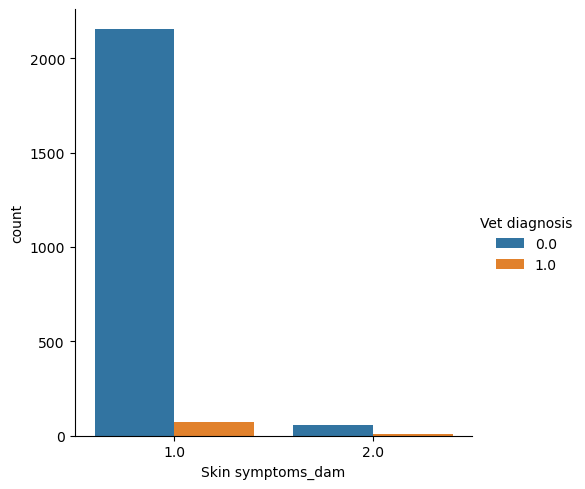

In [15]:
sns.catplot(x='Skin symptoms_dam',hue='Vet diagnosis',data=df,kind="count")
plt.show()

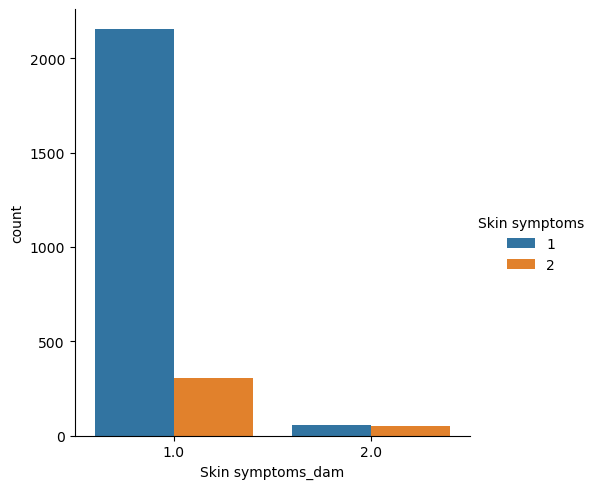

In [16]:
sns.catplot(x='Skin symptoms_dam',hue='Skin symptoms',data=df,kind="count")
plt.show()

#### Dam Dewormend Prebirth 

In [17]:
#0=No, 1=Yes
df['Dam_dewormed_prebirth'].value_counts()

1.0    3383
0.0     141
Name: Dam_dewormed_prebirth, dtype: int64

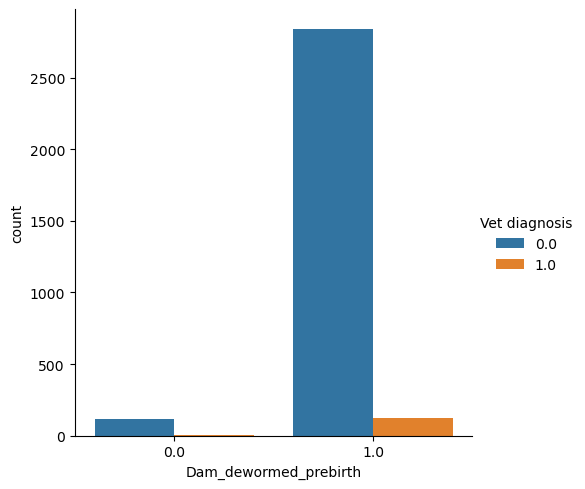

In [18]:
sns.catplot(x='Dam_dewormed_prebirth',hue='Vet diagnosis',data=df,kind="count")
plt.show()

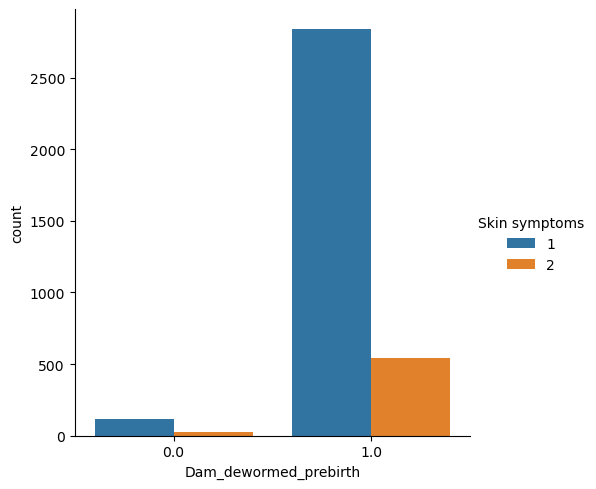

In [19]:
sns.catplot(x='Dam_dewormed_prebirth',hue='Skin symptoms',data=df,kind="count")
plt.show()

#### Dam Vaccinated Prebirth 

In [20]:
#1=No 2=Yes
df['Dam_vaccinated_prebirth'].value_counts()

1    2673
0    2592
Name: Dam_vaccinated_prebirth, dtype: int64

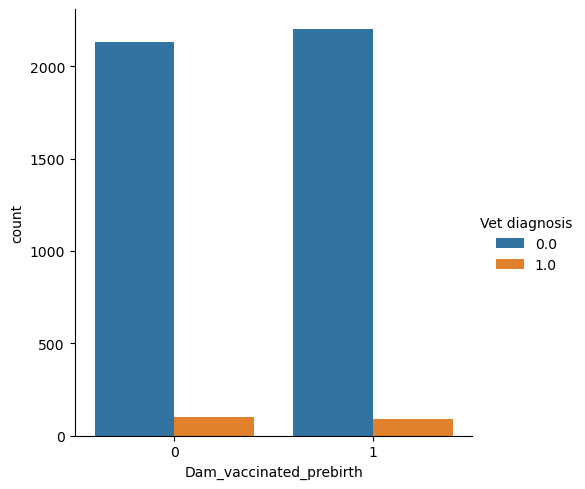

In [21]:
sns.catplot(x='Dam_vaccinated_prebirth',hue='Vet diagnosis',data=df,kind="count")
plt.show()

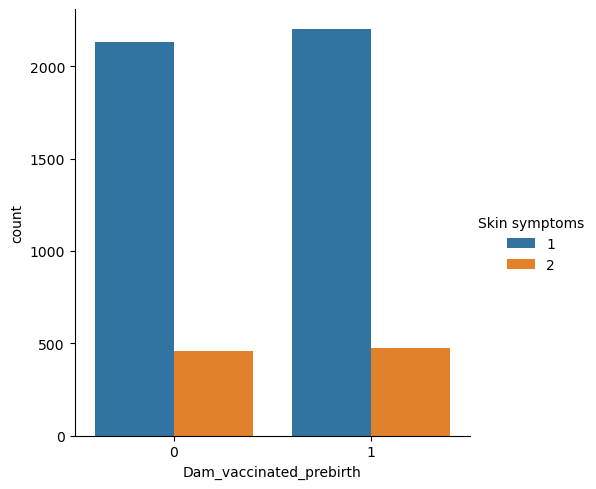

In [22]:
sns.catplot(x='Dam_vaccinated_prebirth',hue='Skin symptoms',data=df,kind="count")
plt.show()

### Visualizing other variables 

In [23]:
df.describe()

,Skin symptoms,Season born,Heating system_house,House _now,House_before,Clean_house,Puppy_dewormed,Puppy_vaccinated,Dam_dewormed_prebirth,Dam_vaccinated_prebirth,...,Does the dog have a yard,Bcs_under 2 mo,Outside_under 2 mo,Outside a day_under 5mo,Skin symptoms_dam,Age,Vet diagnosis,Obey,Reps_lower,Reps_upper
count,5265.000000,5140.000000,4762.000000,5238.000000,3930.000000,5239.000000,4998.000000,5080.000000,3524.000000,5265.000000,...,4967.000000,4048.000000,3754.000000,3869.000000,2566.000000,5201.000000,4524.000000,2375.000000,2478.000000,2478.000000
mean,1.177208,2.437549,1.788324,2.304887,2.243766,1.980340,0.990796,0.987008,0.959989,0.507692,...,1.936783,1.597826,1.897709,2.724218,1.042479,3.962892,0.042440,67.585263,19.325262,32.151735
std,0.381881,1.088688,0.408539,1.015264,1.046692,0.138843,0.095503,0.113251,0.196014,0.499988,...,0.797720,1.082838,1.286624,0.788808,0.201718,3.148606,0.201614,22.003929,18.195878,26.287324
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.000000,30.000000,1.000000,4.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,50.000000,5.000000,15.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,3.000000,1.000000,3.000000,0.000000,70.000000,16.000000,25.000000
75%,1.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,6.000000,0.000000,85.000000,26.000000,40.000000
max,2.000000,4.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,5.000000,5.000000,4.000000,2.000000,20.000000,1.000000,95.000000,81.000000,100.000000


#### Counts of Category, Classification and Skin symptoms based on dog's age. 

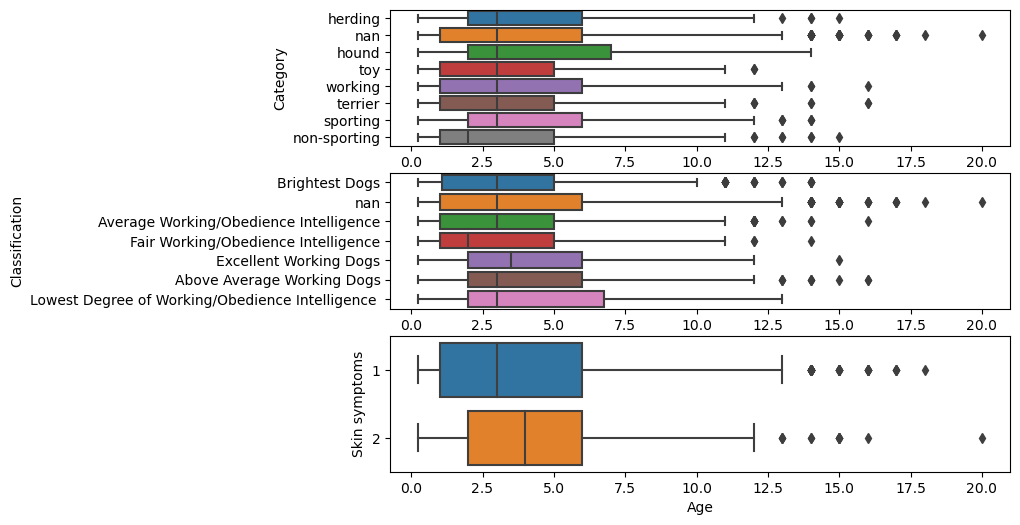

In [24]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(3,1,1)
sns.boxplot(x='Age' , y='Category', data=df, ax=ax1)
ax2 = fig.add_subplot(3,1,2)
sns.boxplot(x='Age' , y='Classification', data=df, ax=ax2)
ax3 = fig.add_subplot(3,1,3)
sns.boxplot(x='Age' , y='Skin symptoms', data=df, orient='h', ax=ax3)
width = 8
height = 6
fig.set_size_inches(width, height)
plt.show()

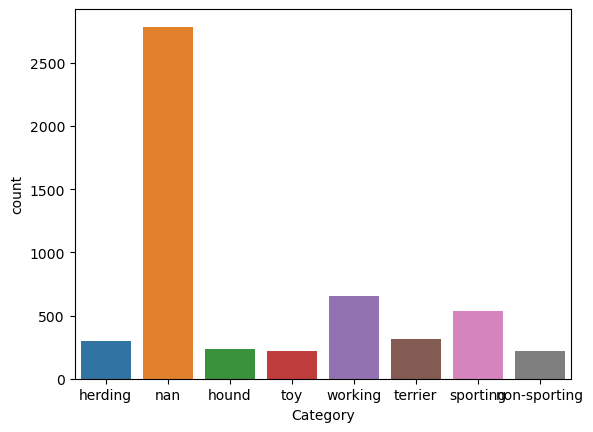

In [25]:
sns.countplot(data = df, x = 'Category')
plt.show()

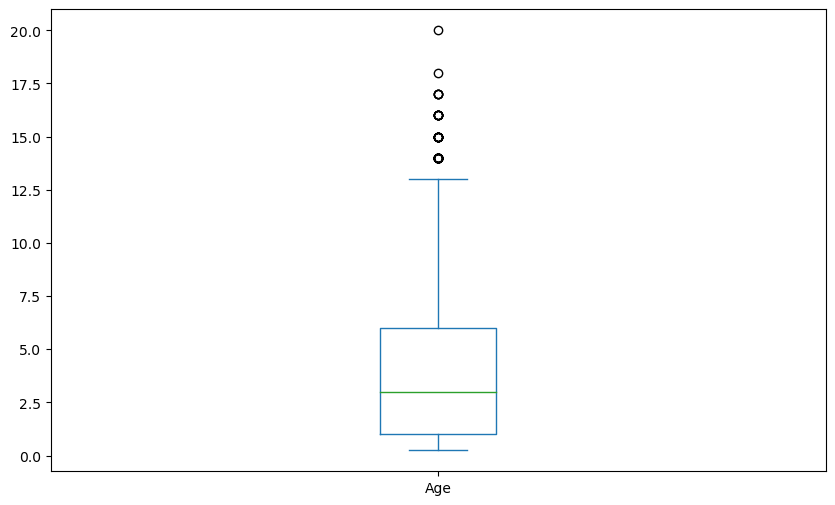

In [26]:
df['Age'].plot.box(figsize=(10,6))
plt.show()

In [27]:
df.columns

Index(['Skin symptoms', 'Season born', 'Heating system_house', 'House _now',
       'House_before', 'Clean_house', 'Puppy_dewormed', 'Puppy_vaccinated',
       'Dam_dewormed_prebirth', 'Dam_vaccinated_prebirth', 'Gender',
       'Over 50% white', 'Other animals', 'Other dogs', 'Born in owner family',
       'Smoking_previously', 'Does the dog have a yard', 'Bcs_under 2 mo',
       'Outside_under 2 mo', 'Outside a day_under 5mo', 'Skin symptoms_dam',
       'Age', 'Vet diagnosis', 'Breed_En', 'Classification', 'Obey',
       'Reps_lower', 'Reps_upper', 'Height_low_inches', 'Height_high_inches',
       'Weight_low_lbs', 'Weight_high_lbs', 'Category'],
      dtype='object')

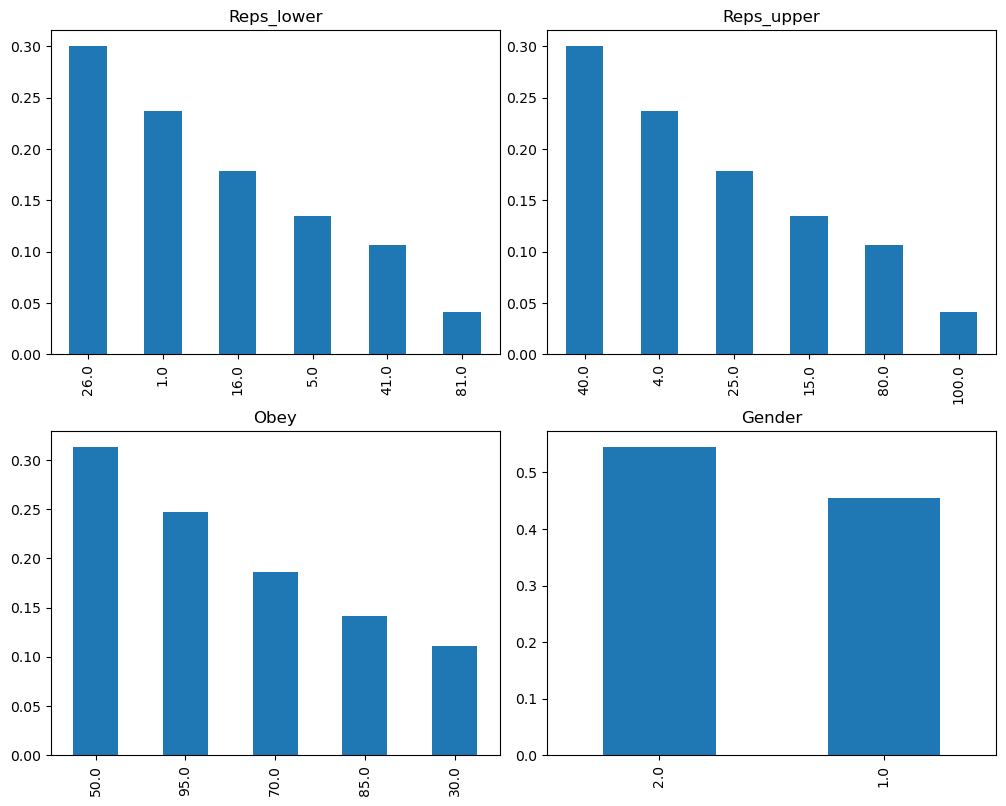

In [28]:
plt.subplot(221)
df.Reps_lower.value_counts(normalize=True).plot(kind = 'bar', title = "Reps_lower",figsize=(10,8))
plt.tight_layout(pad=0.5)
plt.subplot(222)
df.Reps_upper.value_counts(normalize=True).plot(kind = 'bar', title = "Reps_upper")
plt.tight_layout(pad=0.5)
plt.subplot(223)
df.Obey.value_counts(normalize=True).plot(kind = 'bar',title = "Obey")
plt.tight_layout(pad=0.5)
plt.subplot(224)
df.Gender.value_counts(normalize=True).plot(kind = 'bar',title = "Gender")
plt.tight_layout(pad=0.5)
plt.show()

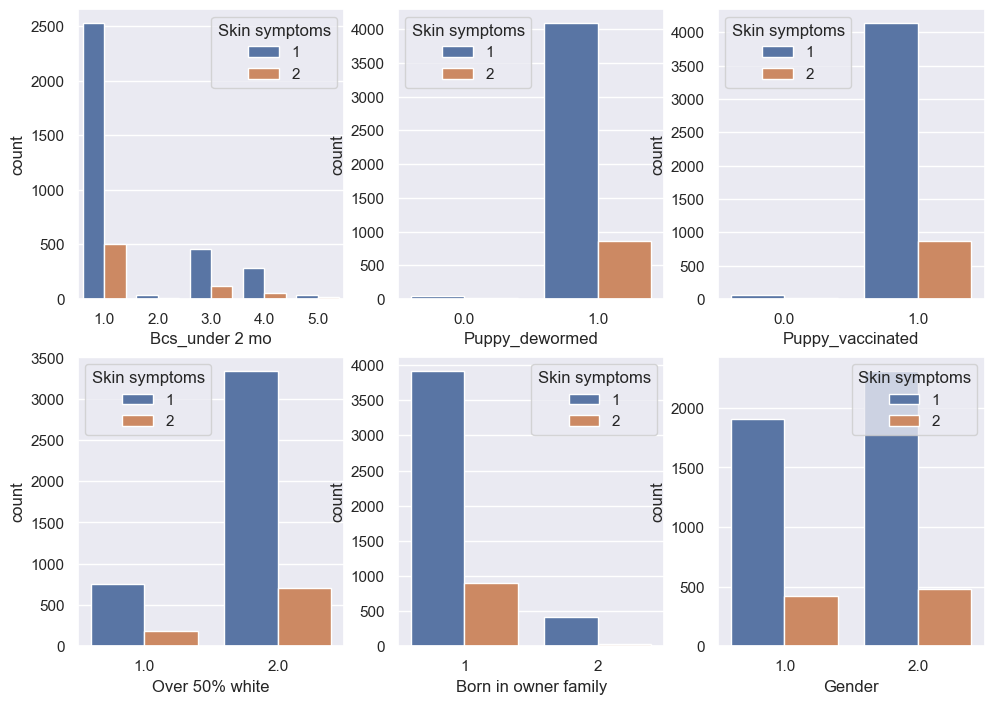

In [29]:
#Characteristics of pup
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Bcs_under 2 mo", hue='Skin symptoms', data=df)
plt.subplot(232)
sns.countplot(x="Puppy_dewormed", hue='Skin symptoms', data=df)
plt.subplot(233)
sns.countplot(x="Puppy_vaccinated", hue='Skin symptoms', data=df)
plt.subplot(234)
sns.countplot(x="Over 50% white", hue='Skin symptoms', data=df)
plt.subplot(235)
sns.countplot(x="Born in owner family", hue='Skin symptoms', data=df)
plt.subplot(236)
sns.countplot(x="Gender", hue='Skin symptoms', data=df)
plt.show()

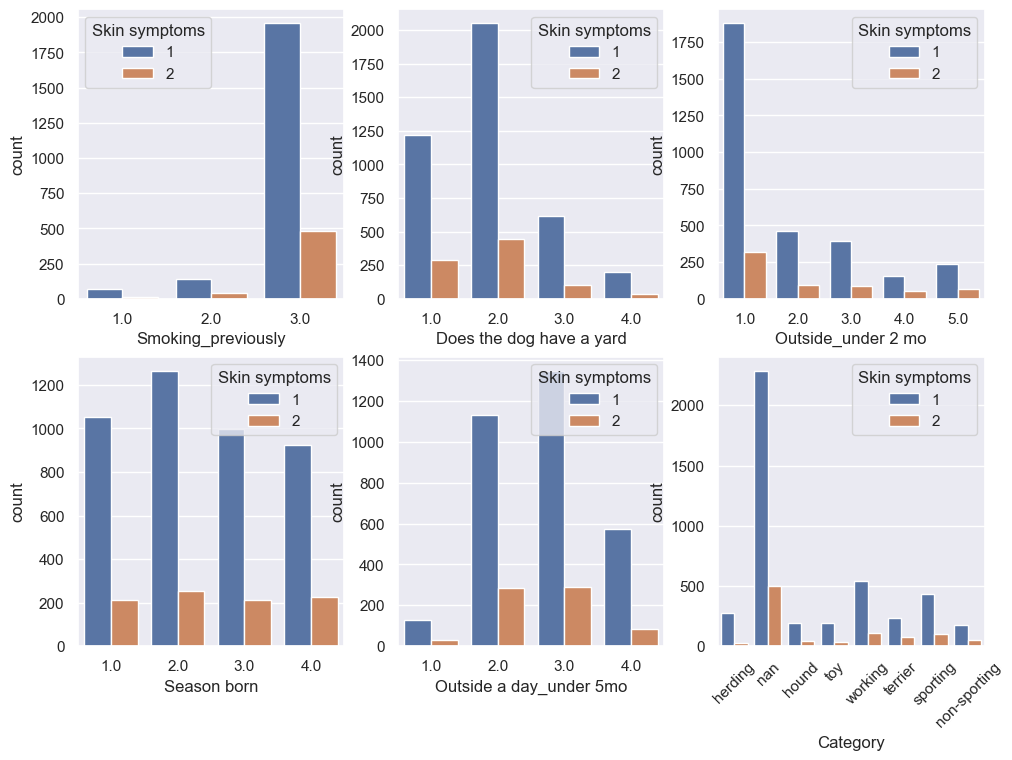

In [30]:
#Outside Environment
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Smoking_previously", hue='Skin symptoms', data=df)
plt.subplot(232)
sns.countplot(x="Does the dog have a yard", hue='Skin symptoms', data=df)
plt.subplot(233)
sns.countplot(x="Outside_under 2 mo", hue='Skin symptoms', data=df)
plt.subplot(234)
sns.countplot(x="Season born", hue='Skin symptoms', data=df)
plt.subplot(235)
sns.countplot(x="Outside a day_under 5mo", hue='Skin symptoms', data=df)
plt.subplot(236)
sns.countplot(x="Category", hue='Skin symptoms', data=df)
plt.xticks(rotation=45)
plt.show()

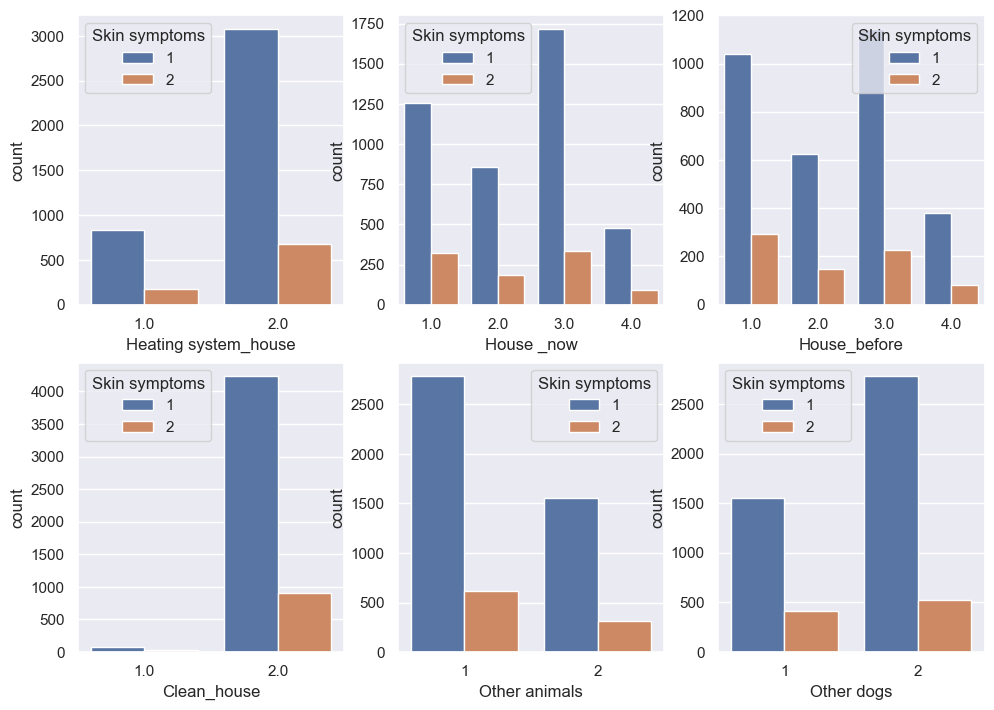

In [31]:
#House Environment
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Heating system_house", hue='Skin symptoms', data=df)
plt.subplot(232)
sns.countplot(x="House _now", hue='Skin symptoms', data=df)
plt.subplot(233)
sns.countplot(x="House_before", hue='Skin symptoms', data=df)
plt.subplot(234)
sns.countplot(x="Clean_house", hue='Skin symptoms', data=df)
plt.subplot(235)
sns.countplot(x="Other animals", hue='Skin symptoms', data=df)
plt.subplot(236)
sns.countplot(x="Other dogs", hue='Skin symptoms', data=df)
plt.show()

In [32]:
correlation_mat = df.corr()

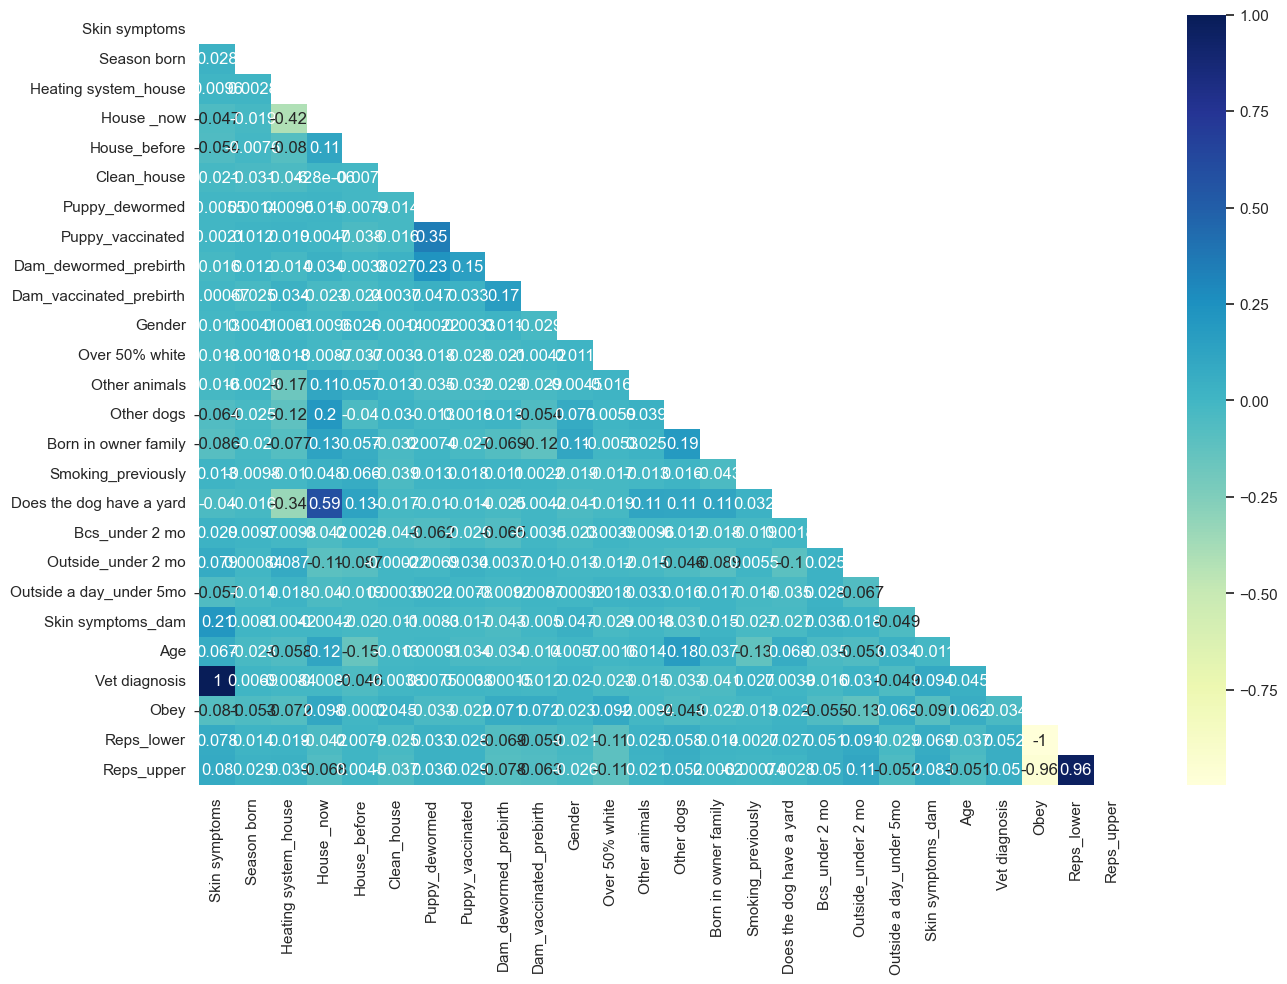

In [33]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(correlation_mat,
mask=mask,cmap="YlGnBu", annot=True)
    plt.show()

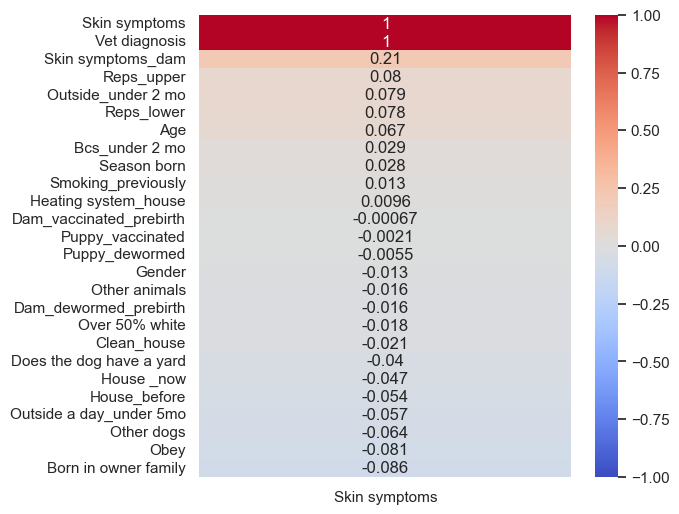

In [34]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_mat[['Skin symptoms']].sort_values(by=['Skin symptoms'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()

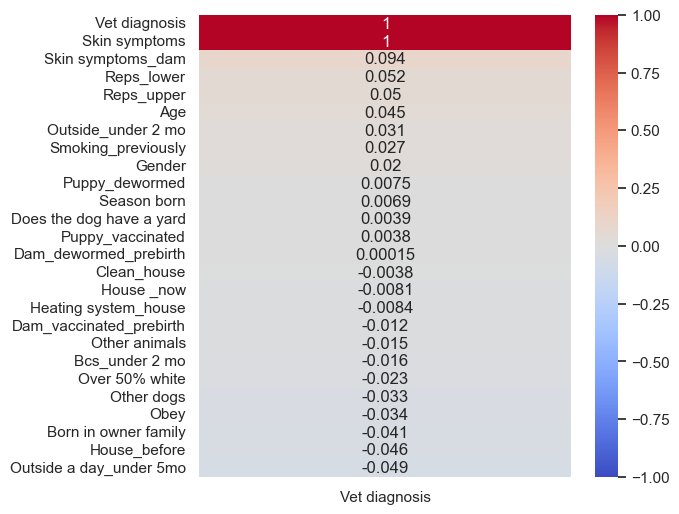

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_mat[['Vet diagnosis']].sort_values(by=['Vet diagnosis'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()

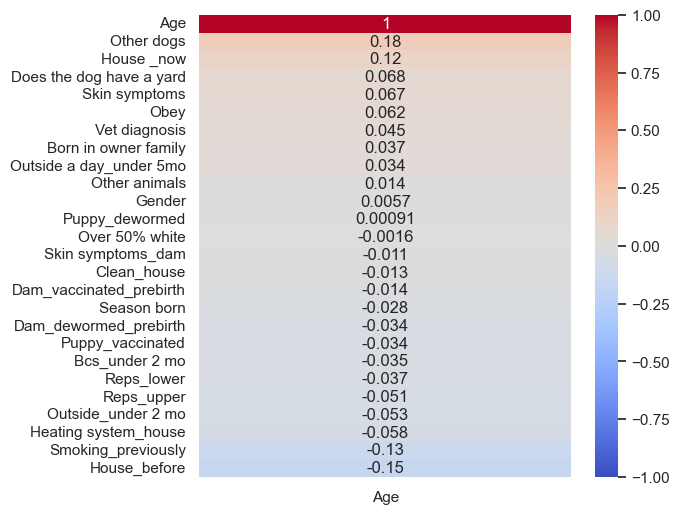

In [36]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_mat[['Age']].sort_values(by=['Age'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()

In [37]:
df[['Age', 'Reps_lower', 'Reps_upper', 'Obey', 'Height_high_inches', 'Height_low_inches', 'Weight_high_lbs', 'Weight_low_lbs']].describe(include='all')

,Age,Reps_lower,Reps_upper,Obey,Height_high_inches,Height_low_inches,Weight_high_lbs,Weight_low_lbs
count,5201.000000,2478.000000,2478.000000,2375.000000,2478,2478,2478,2478
unique,NaN,NaN,NaN,NaN,26,25,41,43
top,NaN,NaN,NaN,NaN,24,21,80,55
freq,NaN,NaN,NaN,NaN,388,416,246,324
mean,3.962892,19.325262,32.151735,67.585263,NaN,NaN,NaN,NaN
std,3.148606,18.195878,26.287324,22.003929,NaN,NaN,NaN,NaN
min,0.250000,1.000000,4.000000,30.000000,NaN,NaN,NaN,NaN
25%,1.000000,5.000000,15.000000,50.000000,NaN,NaN,NaN,NaN
50%,3.000000,16.000000,25.000000,70.000000,NaN,NaN,NaN,NaN
75%,6.000000,26.000000,40.000000,85.000000,NaN,NaN,NaN,NaN


In [38]:
#average higher and lower values on a separate df for visibility
df2 = df[df['Obey']>0]

In [39]:
df2['Reps'] = 0.5*(df2['Reps_lower'] + df2['Reps_upper'])
df2 = df2[df2['Height_low_inches']!='na']
df2['Height_inches'] = 0.5*(df2['Height_low_inches'].astype(float) + df2['Height_high_inches'].astype(float))
df2['Weight_lbs'] = 0.5*(df2['Weight_low_lbs'].astype(float) + df2['Weight_high_lbs'].astype(float))
# group height and weight into larger bins
df2['Height_inches'] = df2['Height_inches'].apply(lambda x: 5*round(1/5*x))
df2['Weight_lbs'] = df2['Weight_lbs'].apply(lambda x: 20*round(1/20*x))

/var/folders/2z/frb2n0xx0xbfzmbmnjvfppjh0000gn/T/ipykernel_17565/4090076117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Reps'] = 0.5*(df2['Reps_lower'] + df2['Reps_upper'])


In [40]:
cols2drop = ['Reps_lower', 'Reps_upper', 
             'Height_low_inches', 'Height_high_inches',
             'Weight_low_lbs', 'Weight_high_lbs']
df2 = df2.drop(cols2drop, axis=1)

In [41]:
df2[['Age', 'Reps', 'Height_inches', 'Obey', 'Weight_lbs']].describe(include='all')

,Age,Reps,Height_inches,Obey,Weight_lbs
count,2323.00000,2349.000000,2349.000000,2349.000000,2349.000000
mean,3.86526,22.818433,19.548744,67.779906,53.154534
std,2.99539,17.867143,5.641236,22.047042,33.482718
min,0.25000,2.500000,10.000000,30.000000,0.000000
25%,1.00000,2.500000,15.000000,50.000000,20.000000
50%,3.00000,20.500000,20.000000,70.000000,60.000000
75%,6.00000,33.000000,25.000000,95.000000,60.000000
max,16.00000,60.500000,30.000000,95.000000,160.000000


This adjustment allows us to see more clearly the weight of the values. Given the similarities in the descriptive data between dfs using the mean for null values can maintain the overall impact of each feature. 

In [42]:
#Drop smoking column as it does not present or show any significant correlation with target variable and it has over 50% missing values. 
df = df.drop(['Smoking_previously'], axis=1)

In [43]:
df.shape

(5265, 32)

In [44]:
df['Breed_En'].value_counts().head(30)

multiracial                       699
German shepherd                   392
Labrador Retriever                199
Rottweiler                        150
Finnish Lapphund                  136
Golden Retriever                  125
Staffordshire Bull Terrier        100
Border Collie                      97
Shetland sheepdog                  95
hovawart                           89
Jack Russell Terrier               85
Lapponian Herder                   78
Bernese Mountain Dog               77
novascotiannoutaja                 71
Cavalier King Charles Spaniel      70
Belgian Sheepdog                   66
Dobermann                          65
Boxer                              65
Australian Shepherd                62
Great Dane                         62
Samoyed                            51
Spanish Water Dog                  50
English Cocker Spaniel             49
collie, shorthair.                 47
French Bulldog                     46
Cairn Terrier                      44
Chinese Cres

In [45]:
#Evaluating most common breed with over 100 records each.
Common_breeds = df[df['Breed_En'].isin(['multiracial', 'German shepherd', 'Labrador Retriever', 'Rottweiler',  'Finnish Lapphund', 'Golden Retriever', 'Staffordshire Bull Terrier'])]
Common_breeds['Breed_En'].value_counts()

multiracial                   699
German shepherd               392
Labrador Retriever            199
Rottweiler                    150
Finnish Lapphund              136
Golden Retriever              125
Staffordshire Bull Terrier    100
Name: Breed_En, dtype: int64

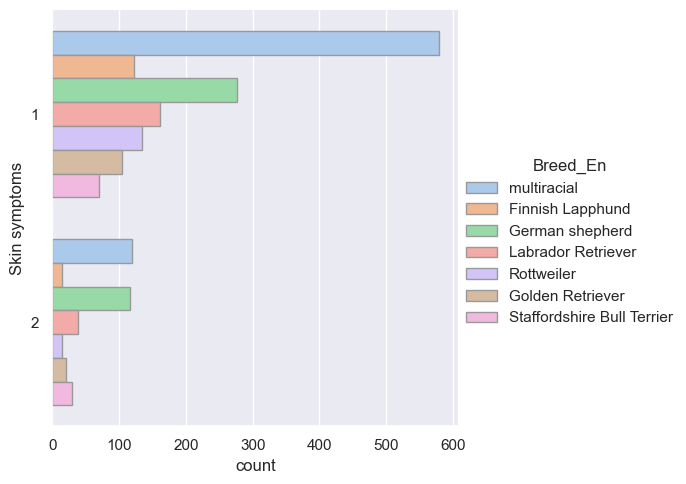

In [46]:
sns.catplot(
    data=Common_breeds, y="Skin symptoms", hue="Breed_En", kind="count",
    palette="pastel", edgecolor=".6",
)
plt.show()

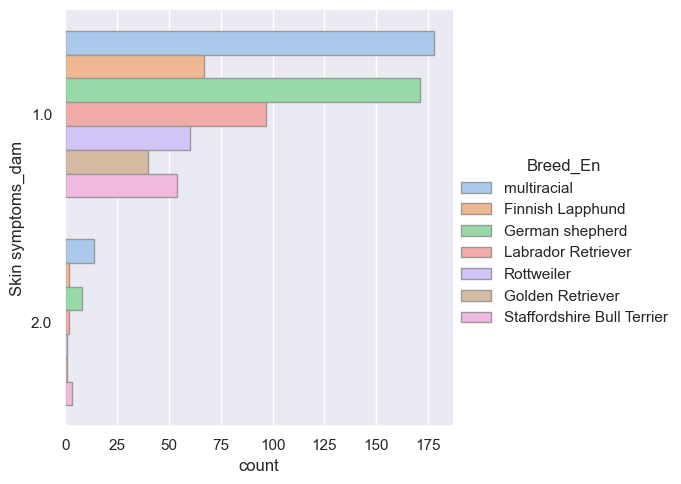

In [47]:
sns.catplot(
    data=Common_breeds, y="Skin symptoms_dam", hue="Breed_En", kind="count",
    palette="pastel", edgecolor=".6",
)
plt.show()

### Summary 

While exploring possible relations between a vet diagnosis or skin symptoms on a pup given the prebirth conditions or skin symptoms of the pup’s mom we found the following: 
- Skin condition on the dam does not show any relevant relation with a positive vet diagnosis. However, when looking into the number of cases recorded for dam having skin condition, there is an almost 50-50 split in the counts of cases where the pup also has skin conditions which may indicate it can be hereditary. 
- Dam dewormed prebirth does no display a strong relation as most of the records indicate that the dam was dewormed and positive skin condition for pup raise as the counts of dam dewormed counts increase. 
- Dam vaccinated prebirth shows zero impact on either a vet diagnosis or skin symptoms as both counts regardless of vaccination are virtually the same. 

Other details of the data include: 
- The average age of the dogs in the study is 3.96 years. There is no information about the dog’s life span, therefore, we can infer that the average is reasonable due to vet visits being more frequent in the early/mid years of the dog’s life. The age range in the data goes from 3 months of age up to 20 years old. **A dogs average life span varies on breed but average is within 9-12 years of life for most breeds.** 
- Most dogs in the dataset are considered of “working” followed by “sporting” with the least categories being “toy” and “non-sporting”. 
- Most dogs are also in the Average Working/Obedience classification followed by Brightest dogs. 
- A somewhat even distribution in gender with about 55% female and 45% male 
 
Correlations based on characteristics of the dog: 
- Skin symptoms seem to not be strongly related with any of the dog’s characteristics as the number of recorded positive skin symptoms increase as the total count increase for every feature. There is slightly a higher number of positive cases for the male gender and for dogs born in the fall. Also, there are more cases of skin symptoms present on dogs that are over 50% white compared to those that are not. 
- Lastly there is a slight increase in number of positive skin symptoms for dogs with bcs considered “fat” under 2 months. 

Correlations based on outside environment of the dog: 
- Terrier and non-sporting categories have a higher number of recorded skin symptoms than other categories. 
- Lack of exposure to the outside environment under 2 months shows a slight relation with skin symptoms as the least number of times a dog is outside the higher the ratio between positive skin condition. 

Checking for any direct correlation with either skin symptom or vet diagnosis we found that skin symptoms on the dam have the highest correlation with both. For skin symptoms it is followed by outside time under 2 months at 0.11. 

Additionally, we adjusted the reps, heigh and weight columns to provide the higher and lower average thus allowing for a thorough description of the data. Lastly, the smoking_previously column was dropped as after EDA there was no significant data to show that it has any impact ton skin symptom variable and it had over 50% missing values. 


In [48]:
#Save updated df 
df.to_csv('../Data/df_updated.csv')